In [1]:
import cv2
from PIL import Image, ImageDraw
import sys
# define acllite library path
sys.path.append('../../Common/acllite')
# modules of acllite library
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, postprocessing

In [2]:
# define device id & model path
device_id = 0
model_path = 'model/yolov4.om'

# define image & coco_names paths
img_path = "../../Common/data/kite.jpg"
coco_names_path = "../../Common/data/coco.names"

In [3]:
with open(coco_names_path) as fd:
    coco_labels = fd.readlines()

labels = [i[:-1] for i in coco_labels][1:]

In [4]:
# initialize acllite library
acl_resource = AclLiteResource()
acl_resource.init()

# load *.om model
model = AclLiteModel(model_path,device_id)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 368220
malloc output 1, size 1472880
malloc output 2, size 5891520
Create model output dataset success
Init model resource success


In [5]:
# read image
img_org_bgr = cv2.imread(img_path)

In [6]:
# 1) pre-processing stage
data, orig = preprocessing(img_org_bgr,model._model_desc)

model input size 1
input  0
model input dims ({'name': 'x', 'dimCount': 4, 'dims': [1, 3, 608, 608]}, 0)
model input datatype 0
model output size 3
output  0
model output dims ({'name': 'output_0_trans_Cast_353_0', 'dimCount': 5, 'dims': [1, 19, 19, 3, 85]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'output_1_trans_Cast_354_0', 'dimCount': 5, 'dims': [1, 38, 38, 3, 85]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'output_2_trans_Cast_355_0', 'dimCount': 5, 'dims': [1, 76, 76, 3, 85]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [7]:
# 2) model execution(forward) stage
result_list = model.execute([data,])

In [8]:
# 3) post-processing the raw predictions
bboxes = postprocessing(result_list, orig, labels, model._model_desc)

In [9]:
img_out = Image.open(img_path)
img1 = ImageDraw.Draw(img_out)
for idx,bbox in enumerate(bboxes):
    img1.rectangle(list(bbox[0]), outline ="red", width=2)
    print(bbox[0], bbox[1], int(bbox[2]), coco_labels[int(bbox[2])])

[414.0, 55.0, 468.0, 104.0] 0.9834136962890625 33 kite

[194.0, 163.0, 213.0, 196.0] 0.9454641342163086 33 kite

[326.0, 237.0, 338.0, 250.0] 0.8663406372070312 33 kite

[211.0, 262.0, 228.0, 287.0] 0.655609130859375 33 kite

[78.0, 428.0, 113.0, 533.0] 0.9951171875 0 person

[150.0, 487.0, 188.0, 600.0] 0.9677734375 0 person

[57.0, 354.0, 73.0, 395.0] 0.8996067047119141 0 person

[25.0, 357.0, 37.0, 391.0] 0.7669105529785156 0 person

[241.0, 339.0, 248.0, 352.0] 0.7589712142944336 0 person

[124.0, 377.0, 133.0, 399.0] 0.6781826019287109 0 person

[363.0, 352.0, 372.0, 369.0] 0.6537036895751953 0 person



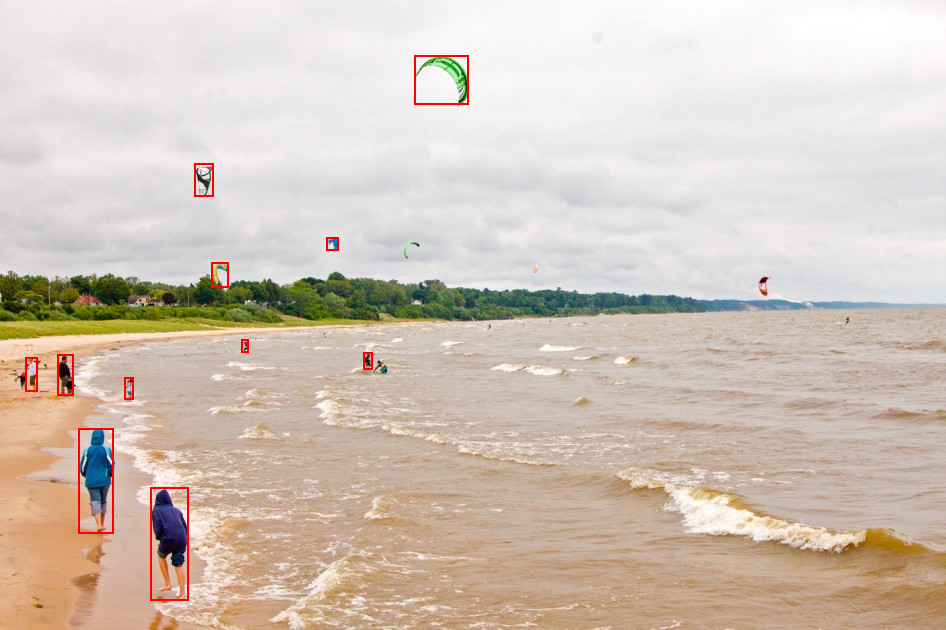

In [10]:
img_out